In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r"C:\Users\narth\Downloads\pulsar_data_train (3).csv")

# Drop rows with missing values
data = data.dropna()

# Separate features and target variable
X = data.drop('target_class', axis=1)  # Replace 'target_column' with your target column name
y = data['target_class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train the Random Forest classifier
Classifier = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=0)
Classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = Classifier.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))







Accuracy: 0.9766355140186916
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2525
           1       0.92      0.82      0.87       257

    accuracy                           0.98      2782
   macro avg       0.95      0.91      0.93      2782
weighted avg       0.98      0.98      0.98      2782



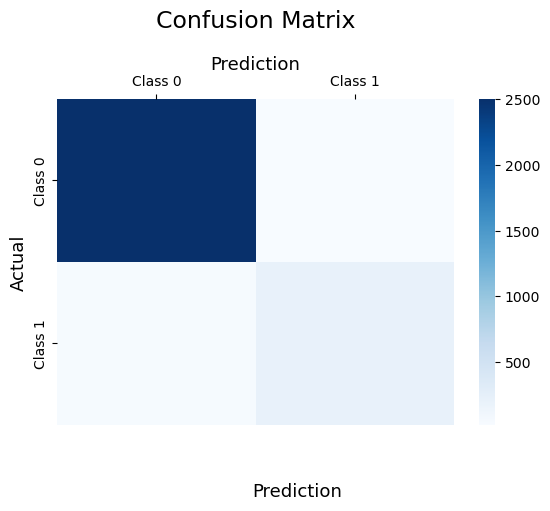

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix without annotations
sns.heatmap(cm, 
            annot=False,  # Do not show values in cells
            fmt='g', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'],
            cmap='Blues')

plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

# Adjust positioning
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()



Accuracy: 0.9766355140186916
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2525
           1       0.92      0.82      0.87       257

    accuracy                           0.98      2782
   macro avg       0.95      0.91      0.93      2782
weighted avg       0.98      0.98      0.98      2782

                                         Feature  Gini Importance
2      Excess kurtosis of the integrated profile         0.407550
0                 Mean of the integrated profile         0.181697
3             Skewness of the integrated profile         0.166936
5         Standard deviation of the DM-SNR curve         0.063247
4                       Mean of the DM-SNR curve         0.059233
6            Excess kurtosis of the DM-SNR curve         0.042128
1   Standard deviation of the integrated profile         0.041388
7                   Skewness of the DM-SNR curve         0.037820


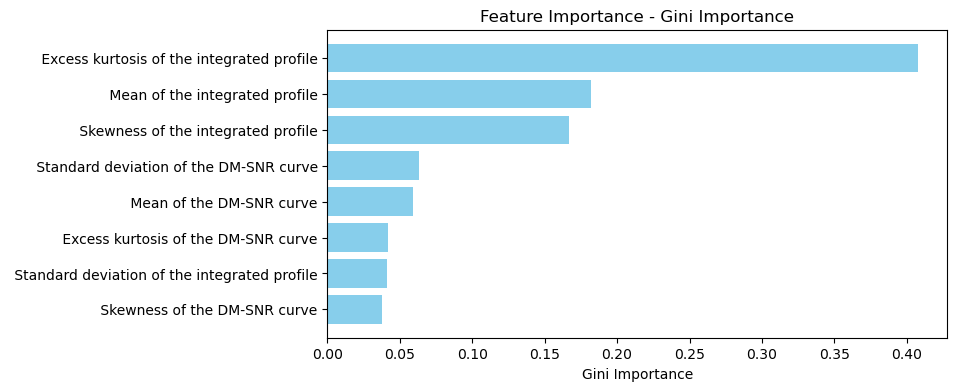

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r"C:\Users\narth\Downloads\pulsar_data_train (3).csv")

# Drop rows with missing values
data = data.dropna()

# Separate features and target variable
X = data.drop('target_class', axis=1)  # Make sure 'target_class' is the correct name of your target column
y = data['target_class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=0)
classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = classifier.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Calculate feature importance (Gini Importance)
importances = classifier.feature_importances_

# Assuming feature_names is the list of your feature column names
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_imp_df)

# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()
